# Final Project for Data Analytics

## Alyssa June Pacleb, Ravi Goparaju, Adeena Amersi, Ryan Chiapoco

In [99]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Science Giving Column Meanings and Types

Header | Definition | Type
---|---------|-------|
`cmte_nm` | Committee name | object
`cmte_id` | Committee identification, assigned | object
`cmte_tp` | Committee type. [List of committee type codes](https://www.fec.gov/campaign-finance-data/committee-type-code-descriptions/)  | object
<font size="5">**`cmte_pty`**</font>  | **Committee party. [List of party codes](https://www.fec.gov/campaign-finance-data/party-code-descriptions/)** | **object**
`cand_name` | Candidate name | object
`cand_pty_affiliation` | Political party affiliation reported by the candidate | object
`cand_office_st` | Candidate state | object
<font size="5">**`cand_office`**</font>  | Candidate office. H = House, P = President, S = Senate | object
`cand_office_district` | Candidate district | float64
`cand_status` | Candidate status. C = Statutory candidate, F = Statutory candidate for future election, N = Not yet a statutory candidate, P = Statutory candidate in prior cycle | object
`rpt_tp` | Report type. [Report type codes](https://www.fec.gov/campaign-finance-data/report-type-code-descriptions/) | object
<font size="5">**`transaction_pgi`**</font> | The code for which the contribution was made. EYYYY (election plus election year). P = Primary, G = General, O = Other, C = Convention, R = Runoff, S = Special, E = Recount | object
`transaction_tp` | Transaction type. [Type codes](https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions/) | object
`entity_tp` | Entity type. Only valid for electronic filings received after April 2002. CAN = Candidate, CCM = Candidate Committee, COM = Committee, IND = Individual (a person), ORG = Organization (not a committee and not a person), PAC = Political Action Committee, PTY = Party Organization | object
`cleaned_name` | Contributor/lender/transfer name | object
`city` | City/town | object
<font size="5">**`state`**</font> | State | object
`zip_code` | Zip code | object
`employer` | Employer | object
<font size="5">**`cleaned_occupation`**</font>  | Occupation | object
`classification` | Classification of occupation | object
`transaction_dt` | Transaction date (MMDDYYYY) | float64
<font size="5">**`cycle`**</font> | Election cycle | float64
`transaction_amt` | Transaction amount | float64
<font size="5">**`2016_dollars`**</font>  | Transation amount adjusted for inflation | float64
`other_id` | Other identification number. For contributions from individuals this column is null. For contributions from candidates or other committees this column will contain that contributor's FEC ID. | object
`tran_id` | Transaction ID | object
`file_num` | A unique identifier associated with each itemization or transaction appearing in an FEC electronic file. Only valid for electronic filings. | float64
`memo_cd` | 'X' indicates that the amount is not to be included in the itemization total. | object
`memo_text` | A description of the activity. | object
`sub_id` | FEC record number | float64


In [100]:
# Don't Run this numerous times for the sake of time
url = 'https://media.githubusercontent.com/media/fivethirtyeight/data/master/science-giving/science_federal_giving.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [101]:
print(df.shape)
df.head()

(881793, 31)


,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,...,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
0,AMERICAN WAY - DURANT 2012; THE,C00501452,S,REP,"DURANT, CLARK",REP,MI,S,0.0,C,...,3302012.0,2012.0,2500.0,2612.50,NaN,SA0108160812336,845273.0,NaN,NaN,1.010000e+18
1,A LOT OF PEOPLE FOR DAVE OBEY,C00017830,H,DEM,"OBEY, DAVID R",DEM,WI,H,7.0,C,...,4182007.0,2008.0,250.0,292.50,NaN,C34559,294636.0,NaN,NaN,4.070000e+18
2,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,...,6092016.0,2016.0,50.0,50.00,C00401224,VSH8VCDY4S4,1096417.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.080000e+18
3,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,...,8192012.0,2012.0,2500.0,2612.50,NaN,C6548162,863428.0,NaN,NaN,4.030000e+18
4,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,7.0,C,...,10292010.0,2010.0,250.0,273.25,NaN,C5156783,863417.0,NaN,NaN,4.030000e+18


# Data preprocessing & dimensionality reduction

In [102]:
#df['2016_dollars'] = pd.to_numeric(df['2016_dollars'])
#donation_mns = df['2016_dollars'].mean()
#df['2016_dollars'].fillna(donation_mns, inplace = True)

print(df.isna().sum()) # Clearly there is a bit of an issue here

cmte_nm                 411590
cmte_id                 411590
cmte_tp                 411590
cmte_pty                411796
cand_name               497992
cand_pty_affiliation    497997
cand_office_st          497992
cand_office             497992
cand_office_district    498030
cand_status             498076
rpt_tp                  411590
transaction_pgi         451317
transaction_tp          411590
entity_tp               411636
cleaned_name            411616
city                    411668
state                   412250
zip_code                412151
employer                413929
cleanedoccupation       411590
classification          411590
transaction_dt          411597
cycle                   411597
transaction_amt         411590
2016_dollars            411619
other_id                783423
tran_id                 411590
file_num                411590
memo_cd                 878451
memo_text               697623
sub_id                  411590
dtype: int64


In [120]:
# These are realistically the only features we care about
new = df.drop(columns=['cand_pty_affiliation', 'cand_name', 'cand_office_st', 'cleaned_name','employer','cmte_nm', 'cmte_id' , 'cmte_tp', 'cand_office_district', 'transaction_amt', 'cand_status', 'rpt_tp', 'transaction_tp', 'tran_id', 'file_num', 'memo_cd', 'memo_text', 'sub_id', 'other_id', 'zip_code', "cand_name", 'entity_tp', 'city','transaction_dt'])

# I only want to look at the general presidential election donations
data = (new[new['transaction_pgi'] == 'G']) 
data = (data[data['cand_office'] == 'P'])
print(data.isna().sum()) 
print(data.shape)
data.head()

cmte_pty               0
cand_office            0
transaction_pgi        0
state                230
cleanedoccupation      0
classification         0
cycle                  0
2016_dollars           0
dtype: int64
(85623, 8)


,cmte_pty,cand_office,transaction_pgi,state,cleanedoccupation,classification,cycle,2016_dollars
1313,IND,P,G,NY,ENGINEER,Engineer,2010.0,566.61
1340,IND,P,G,LA,ENGINEER,Engineer,2010.0,336.60
2213,IND,P,G,LA,ENGINEER,Engineer,2010.0,327.90
3682,LIB,P,G,TX,ENGINEER,Engineer,2008.0,280.50
3683,LIB,P,G,WA,SOFTWARE DEVELOPMENT ENGINEER,Engineer,2008.0,1178.10


In [121]:
# NOW do we take care of the missing state values or do we just delete those rows?
# delete the nan rows. 
copy = data.copy()
copy = copy.dropna()
print(copy.shape)
print(copy.isna().sum()) 
copy.head()

(85393, 8)
cmte_pty             0
cand_office          0
transaction_pgi      0
state                0
cleanedoccupation    0
classification       0
cycle                0
2016_dollars         0
dtype: int64


,cmte_pty,cand_office,transaction_pgi,state,cleanedoccupation,classification,cycle,2016_dollars
1313,IND,P,G,NY,ENGINEER,Engineer,2010.0,566.61
1340,IND,P,G,LA,ENGINEER,Engineer,2010.0,336.60
2213,IND,P,G,LA,ENGINEER,Engineer,2010.0,327.90
3682,LIB,P,G,TX,ENGINEER,Engineer,2008.0,280.50
3683,LIB,P,G,WA,SOFTWARE DEVELOPMENT ENGINEER,Engineer,2008.0,1178.10


In [122]:
copy = copy.drop(columns=['cand_office','transaction_pgi'])
copy.head()

,cmte_pty,state,cleanedoccupation,classification,cycle,2016_dollars
1313,IND,NY,ENGINEER,Engineer,2010.0,566.61
1340,IND,LA,ENGINEER,Engineer,2010.0,336.60
2213,IND,LA,ENGINEER,Engineer,2010.0,327.90
3682,LIB,TX,ENGINEER,Engineer,2008.0,280.50
3683,LIB,WA,SOFTWARE DEVELOPMENT ENGINEER,Engineer,2008.0,1178.10


In [123]:
copy['cmte_pty'].value_counts()

DEM    75541
REP     7942
LIB     1146
GRE      604
IND      153
CST        5
CON        2
Name: cmte_pty, dtype: int64

# I'm throwing away the smaller parties

In [124]:
whole_data = copy[copy['cmte_pty'] != "CON"]
whole_data = whole_data[whole_data['cmte_pty'] != "CST"]
whole_data = whole_data[whole_data['cmte_pty'] != "IND"]
whole_data = whole_data[whole_data['cmte_pty'] != "GRE"]

In [125]:
print(whole_data['cmte_pty'].value_counts())
print(whole_data.shape)

DEM    75541
REP     7942
LIB     1146
Name: cmte_pty, dtype: int64
(84629, 6)


# Let's downscale to make this easier to work with
## The most responsible way to do this is stratified sampling

In [126]:
dem_percentage = 75541/84629*100 #ew oh well
rep_percentage = 7942/84629*100
lib_percentage = 1146/84629*100
print(dem_percentage) # So I want 89.26% of my sample to be democrat
print(rep_percentage) # 9.38% to be republican
print(lib_percentage) # and 1.35% to be libertarian

89.26136430774321
9.384489950253458
1.3541457420033323


In [127]:
only_dems = whole_data[whole_data['cmte_pty'] == 'DEM']
only_reps = whole_data[whole_data['cmte_pty'] == 'REP']
only_libs = whole_data[whole_data['cmte_pty'] == 'LIB']

In [128]:
# We are cutting our dataset down to 10% of what it was before
dem_part = only_dems.sample(frac = 0.1) 
print(dem_part.shape)
rep_part = only_reps.sample(frac = 0.1) 
print(rep_part.shape)
lib_part = only_libs.sample(frac = 0.1) 
print(lib_part.shape)

(7554, 6)
(794, 6)
(115, 6)


In [129]:
# Combine the 3 parties to one dataframe 
frames = [dem_part, rep_part, lib_part] 
stratified_sample = pd.concat(frames) 

In [130]:
stratified_sample.shape

(8463, 6)

# Let's double check our percentages are the same as before

In [131]:
strat_dem_percentage = 7554/8463*100 
strat_rep_percentage = 794/8463*100
strat_lib_percentage = 115/8463*100
print(strat_dem_percentage) # So I want 89.26% of my sample to be democrat
print(strat_rep_percentage) # 9.38% to be republican
print(strat_lib_percentage) # and 1.35% to be libertarian

89.25912796880539
9.382015833628737
1.358856197565875


# All is good, so we can continue with the analysis

In [132]:
for col in whole_data.columns: 
    print(col) 

cmte_pty
state
cleanedoccupation
classification
cycle
2016_dollars


# Data Exploration

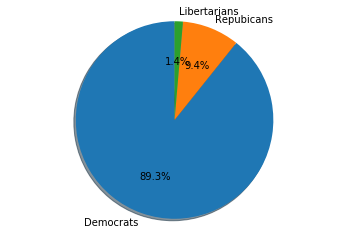

[Text(0, 0, 'Democrat'), Text(0, 0, 'Republican'), Text(0, 0, 'Libertarian')]

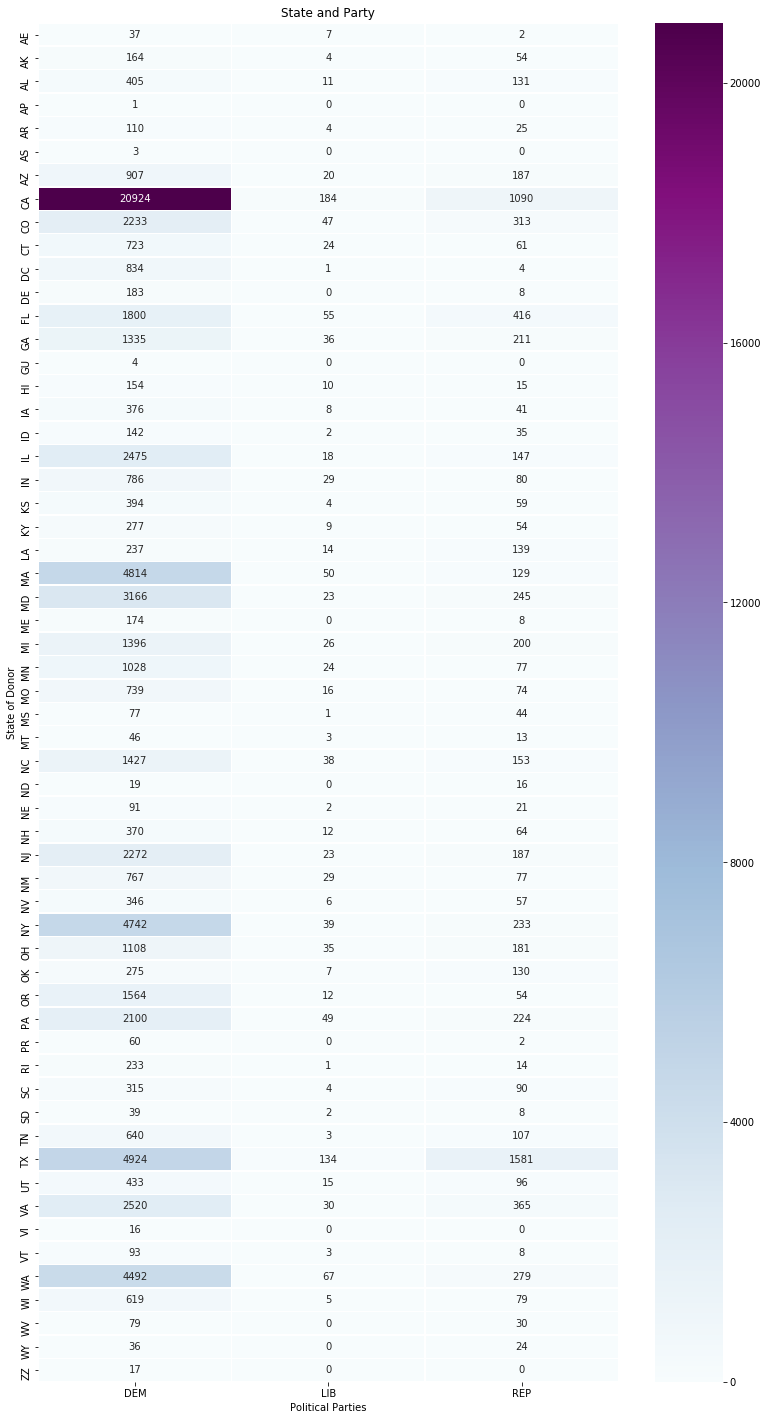

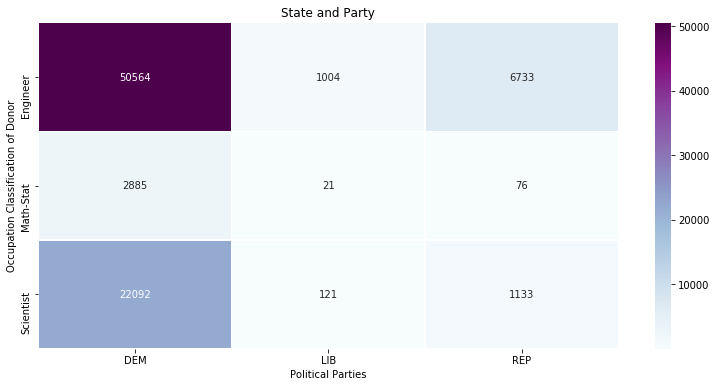

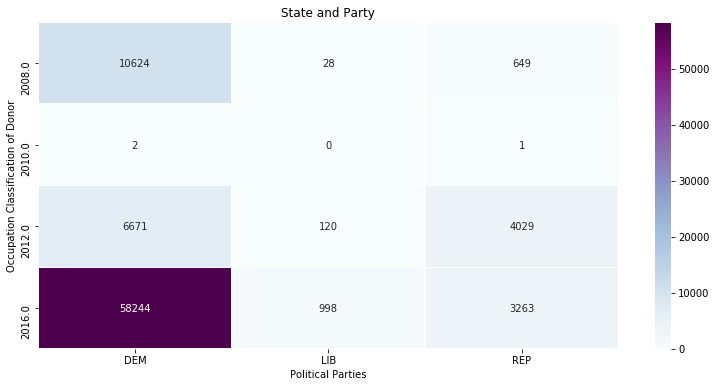

<Figure size 432x288 with 0 Axes>

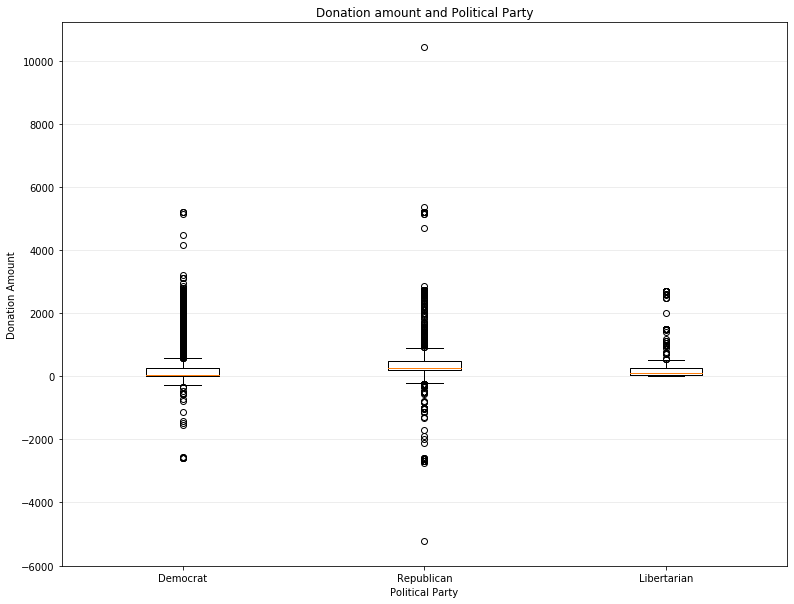

In [135]:
import seaborn as sns
dem = whole_data[whole_data['cmte_pty'] == 'DEM']
rep = whole_data[whole_data['cmte_pty'] == 'REP']
lib = whole_data[whole_data['cmte_pty'] == 'LIB']

ticklabels = ['Democrat', 'Republican', 'Libertarian']

# 1 cmte_pty
labels = 'Democrats', 'Repubicans', 'Libertarians'
sizes = [strat_dem_percentage, strat_rep_percentage, strat_lib_percentage]
explode = (0, 0.0, 0)  # only "explode" the 2nd slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 2 state
state_graph = whole_data.groupby(['state','cmte_pty']).size().reset_index(name='counts')
state_piv = state_graph.pivot("state", "cmte_pty", "counts")
state_piv = state_piv.replace(np.nan, 0) 
fig2, ax2 = plt.subplots(figsize=(13, 25))
sns.heatmap(state_piv, annot=True, linewidths=.5, ax=ax2, cmap='BuPu',fmt='g')
ax2.axes.set_title("State and Party");
ax2.axes.set_xlabel('Political Parties')
ax2.axes.set_ylabel('State of Donor')

# 3 cleanedoccupation- this is stupid we shouldn't do this lmao

# 4 classification
occupation_graph = whole_data.groupby(['classification','cmte_pty']).size().reset_index(name='counts')
occupation_piv = occupation_graph.pivot("classification", "cmte_pty", "counts")
occupation_piv = occupation_piv.replace(np.nan, 0) 
fig3, ax3 = plt.subplots(figsize=(13, 6))
sns.heatmap(occupation_piv, annot=True, linewidths=.5, ax=ax3, cmap='BuPu',fmt='g')
ax3.axes.set_title("State and Party");
ax3.axes.set_xlabel('Political Parties')
ax3.axes.set_ylabel('Occupation Classification of Donor')

# 5 cycle
cycle_graph = whole_data.groupby(['cycle','cmte_pty']).size().reset_index(name='counts')
cycle_piv = cycle_graph.pivot("cycle", "cmte_pty", "counts")
cycle_piv = cycle_piv.replace(np.nan, 0) 
fig5, ax5 = plt.subplots(figsize=(13, 6))
sns.heatmap(cycle_piv, annot=True, linewidths=.5, ax=ax5, cmap='BuPu',fmt='g')
ax5.axes.set_title("State and Party");
ax5.axes.set_xlabel('Political Parties')
ax5.axes.set_ylabel('Occupation Classification of Donor')

# 6 2016_dollars

plt.figure()
fig6, ax6 = plt.subplots(figsize=(13, 10))
ax6.set_title('Donation amount and Political Party')
ax6.set_xlabel('Political Party')
ax6.set_ylabel('Donation Amount')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax6.boxplot([dem['2016_dollars'], rep['2016_dollars'], lib['2016_dollars']])
ax6.set_xticklabels(ticklabels)


### Note that the negative values are refunds

In [ ]:
# Feature Engineering

In [ ]:
# Data Analysis

In [ ]:
# Outcome